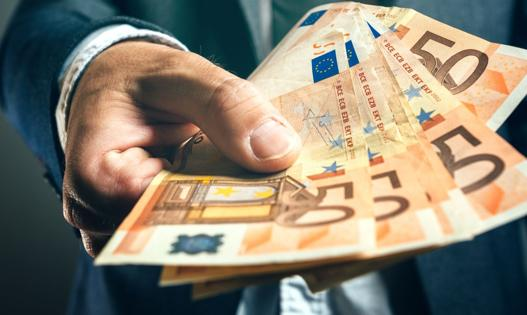

## BANK LOAN
### Predictive machine learning model to know if the customer will have a loan released
### with Random Forest 

In [1]:
#Python Version
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\User\anaconda3\python.exe
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [3]:
# To update a package, run the command below in a terminal or command prompt:
# pip install -U package_name

# To install the exact version of a package, run the command below in a terminal or command prompt:
# !pip install package_name==desired_version

# After installing or updating the package, restart the jupyter notebook.

# Install the watermark package.
# This package is used to write versions of other packages used in this jupyter notebook.
!pip install -q -U watermark

In [4]:
# The first step is to import the packages we're going to use.
# Note: Python packages are "group of resources" available in the tool.


# Pandas: It has numerous functions and commands to import files, analyze and manage data etc.
import pandas as pd

# Matplotlib: It has a series of functions and commands for displaying graphs
import matplotlib.pyplot as plt

# Seaborn: It has a series of functions and commands for displaying graphs (More robust visualizations than Matplotlib)
import seaborn as sns

# Numpy: It has a series of functions and commands to work with numbers in general (formatting, calculations, etc.)
import numpy as np

# Time: It has a number of time functions
import time

# Warnings: It has details about the warnings and alerts that appear, but we can also use it so that alerts for
# future updates and old methods are not displayed
import warnings
warnings.filterwarnings("ignore") 

############################################
from sklearn.model_selection import train_test_split # Used to separate training and test data
from sklearn.preprocessing import StandardScaler # Used to normalize the data
from sklearn.preprocessing import MinMaxScaler # Used to normalize the data
from sklearn.preprocessing import LabelEncoder # Used to do OneHotEncoding
from sklearn.ensemble import RandomForestClassifier # Random Forest Algorithm
from sklearn.metrics import r2_score # Used to measure the accuracy of the predictive model
from sklearn.model_selection import GridSearchCV # Used to create grid with hyperparameters for the predictive model

# Command to display all columns on the file
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Versions of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Mark1_credit" --iversions

Author: Mark1_credit

pandas    : 1.4.2
matplotlib: 3.4.3
numpy     : 1.22.3
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
seaborn   : 0.11.2



In [6]:
# The scikit-learn version
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


## Data Import, Exploratory Analysis and Data Processing

In [7]:
# Command used to load the file and store it as a Pandas DataFrame
# A Pandas DataFrame is like an Excel spreadsheet, where we can manage lines and columns.
# If the excel file is not in the same directory as the script, the path must be specified
df_dados = pd.read_excel("dados_credito.xlsx")

In [8]:
# Command used to check the number of lines and columns in the file
# Columns are also called variables.
df_dados.shape

(4000, 17)

In [9]:
# Command used to check the initial lines of the DataFrame
df_dados.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,0,8,Sim,1800,0,0,56.000000,SIM
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,0,9,Não,4800,1,50000,18.000000,NAO
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,0,18,Sim,2200,2,30000,45.000000,SIM
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,0,22,Não,3900,0,0,28.666667,NAO
4,6,SP,30,Segundo Grau Completo,Divorciado,0,Não,0,0,0,14,Sim,3100,2,40000,39.666667,SIM


In [10]:
# Command used to check the final lines of the DataFrame
df_dados.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
3995,3998,MG,28,Superior Cursando,Casado,3,Sim,1,450000,3200,93,Não,5300,0,0,94.666667,NAO
3996,3999,SC,30,Superior Completo,Viuvo,1,Não,3,900000,0,150,Não,18300,1,80000,98.000000,SIM
3997,4000,PR,32,Superior Cursando,Solteiro,0,Não,0,0,0,8,Sim,1800,0,0,12.000000,NAO
3998,4001,RJ,35,Superior Completo,Solteiro,1,Não,0,0,0,9,Não,4800,1,50000,82.035714,SIM
3999,4002,SP,42,Segundo Grau Completo,Casado,0,Sim,1,220000,0,18,Sim,2200,2,30000,23.000000,NAO


In [11]:
# Command used to check information about the data (Variable types, Variables, Number of records, etc.)
# The variable CODIGO_CLIENTE can be excluded
# # The variables UF, ESCOLARIDADE, CASA_PROPRIA, OUTRA_RENDA, TRABALHANDO_ATUALMENTE and ESTADO_CIVIL --> OneHotEncoding
# # The variable ULTIMO_SALARIO is as a STRING and needs to be NUMERIC

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              4000 non-null   int64  
 1   UF                          4000 non-null   object 
 2   IDADE                       4000 non-null   int64  
 3   ESCOLARIDADE                4000 non-null   object 
 4   ESTADO_CIVIL                4000 non-null   object 
 5   QT_FILHOS                   4000 non-null   int64  
 6   CASA_PROPRIA                4000 non-null   object 
 7   QT_IMOVEIS                  4000 non-null   int64  
 8   VL_IMOVEIS                  4000 non-null   int64  
 9   OUTRA_RENDA_VALOR           4000 non-null   int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  4000 non-null   int64  
 11  TRABALHANDO_ATUALMENTE      4000 non-null   object 
 12  ULTIMO_SALARIO              4000 non-null   int64  
 13  QT_CARROS                   4000 

In [12]:
# Let's delete the CODIGO_CLIENTE variable
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [13]:
# Command used to evaluate if any variable has null value or called values missing or NAN (Not Available)
# The variable ULTIMO_SALARIO has NULL values and we will need to manage it
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE_CREDITO                 0
EMPRESTIMO                    0
dtype: int64

In [14]:
# Let's evaluate some basic statistical measures
df_dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,41.006500,1.116000,0.848250,238716.250000,643.650000,43.142750,8293.27500,0.936000,41023.000000,60.241018
std,13.905891,0.975593,0.958098,266010.406037,1297.939074,40.893911,5829.10258,0.806887,47461.411877,25.672385
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.00000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.00000,0.000000,0.000000,39.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.00000,1.000000,35000.000000,61.666667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.00000,2.000000,50000.000000,83.666667
max,65.000000,3.000000,3.000000,900000.000000,4000.000000,150.000000,22000.00000,2.000000,180000.000000,98.000000


In [15]:
# Now we will evaluate the OUTLIERS columns that are numeric
# OUTLIERS are outliers that are far above or far below the other values

# Let's load in a list the variables that are from type INT64 AND FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:16].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : int64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE_CREDITO : float64


In [16]:
# Let's look at the list of variables and evaluate whether these variables have outliers through a boxplot
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE_CREDITO']

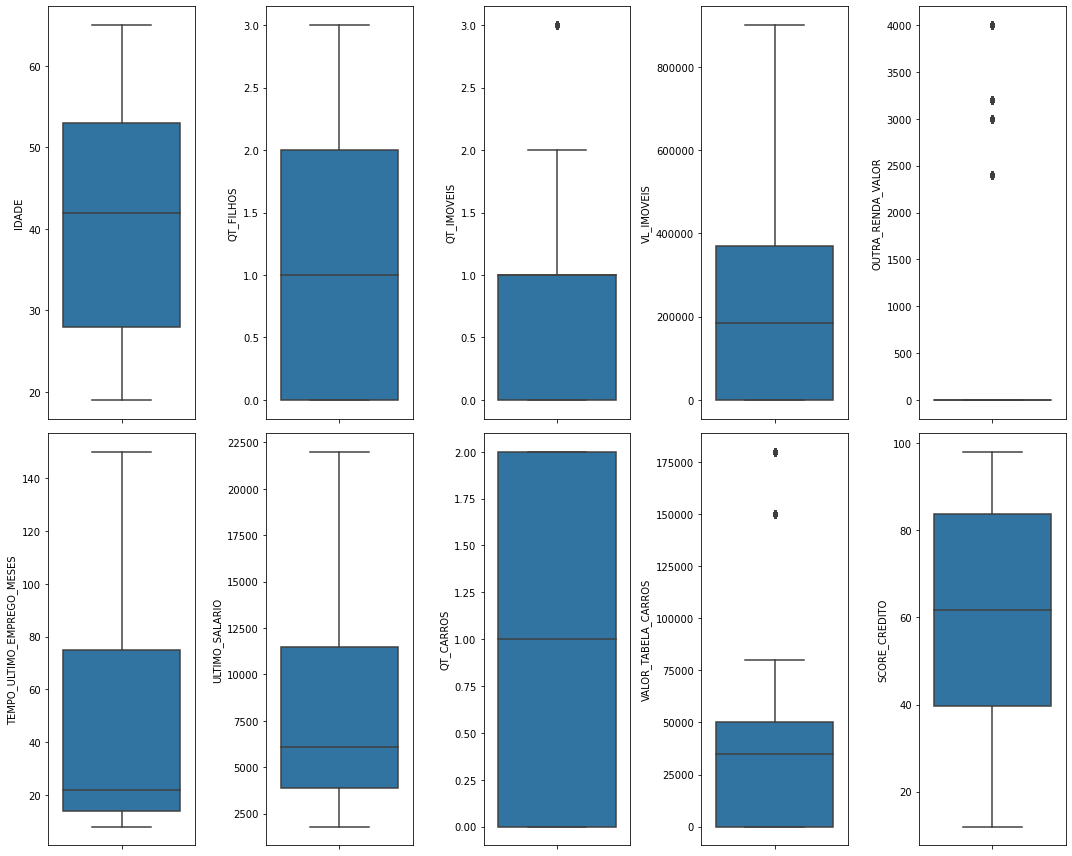

In [17]:
# With this command we will display all graphs of all columns at once to make easier our analysis.

# Here we define the screen size for displaying the graphs
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Here we define in how many lines and columns we want to display the graphs
f, axes = plt.subplots(2, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

In [18]:
# Let's evaluate the other variables with possible outliers

In [19]:
# We don't need to change anything
# I disagree with this point. For other incomes in relation to zero, not even added together, come close to it.
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       3186
2400     179
3000     235
3200     200
4000     200
dtype: int64

In [20]:
df_dados['OUTRA_RENDA_VALOR'].value_counts()

0       3186
3000     235
4000     200
3200     200
2400     179
Name: OUTRA_RENDA_VALOR, dtype: int64

In [21]:
# We don't need to change anything
df_dados.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         1438
28000      179
30000      302
35000      300
40000      301
48000      200
50000      502
70000      199
80000      200
150000     179
180000     200
dtype: int64

In [22]:
# We don't need to change anything
df_dados.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    1785
1    1437
2     378
3     400
dtype: int64

In [23]:
# The original value inside the loop index was 48 - unnecessary as 16 is sufficient.
variaveis_categoricas = []
for i in df_dados.columns[0:16].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_categoricas.append(i)           


UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
TRABALHANDO_ATUALMENTE : object
EMPRESTIMO : object


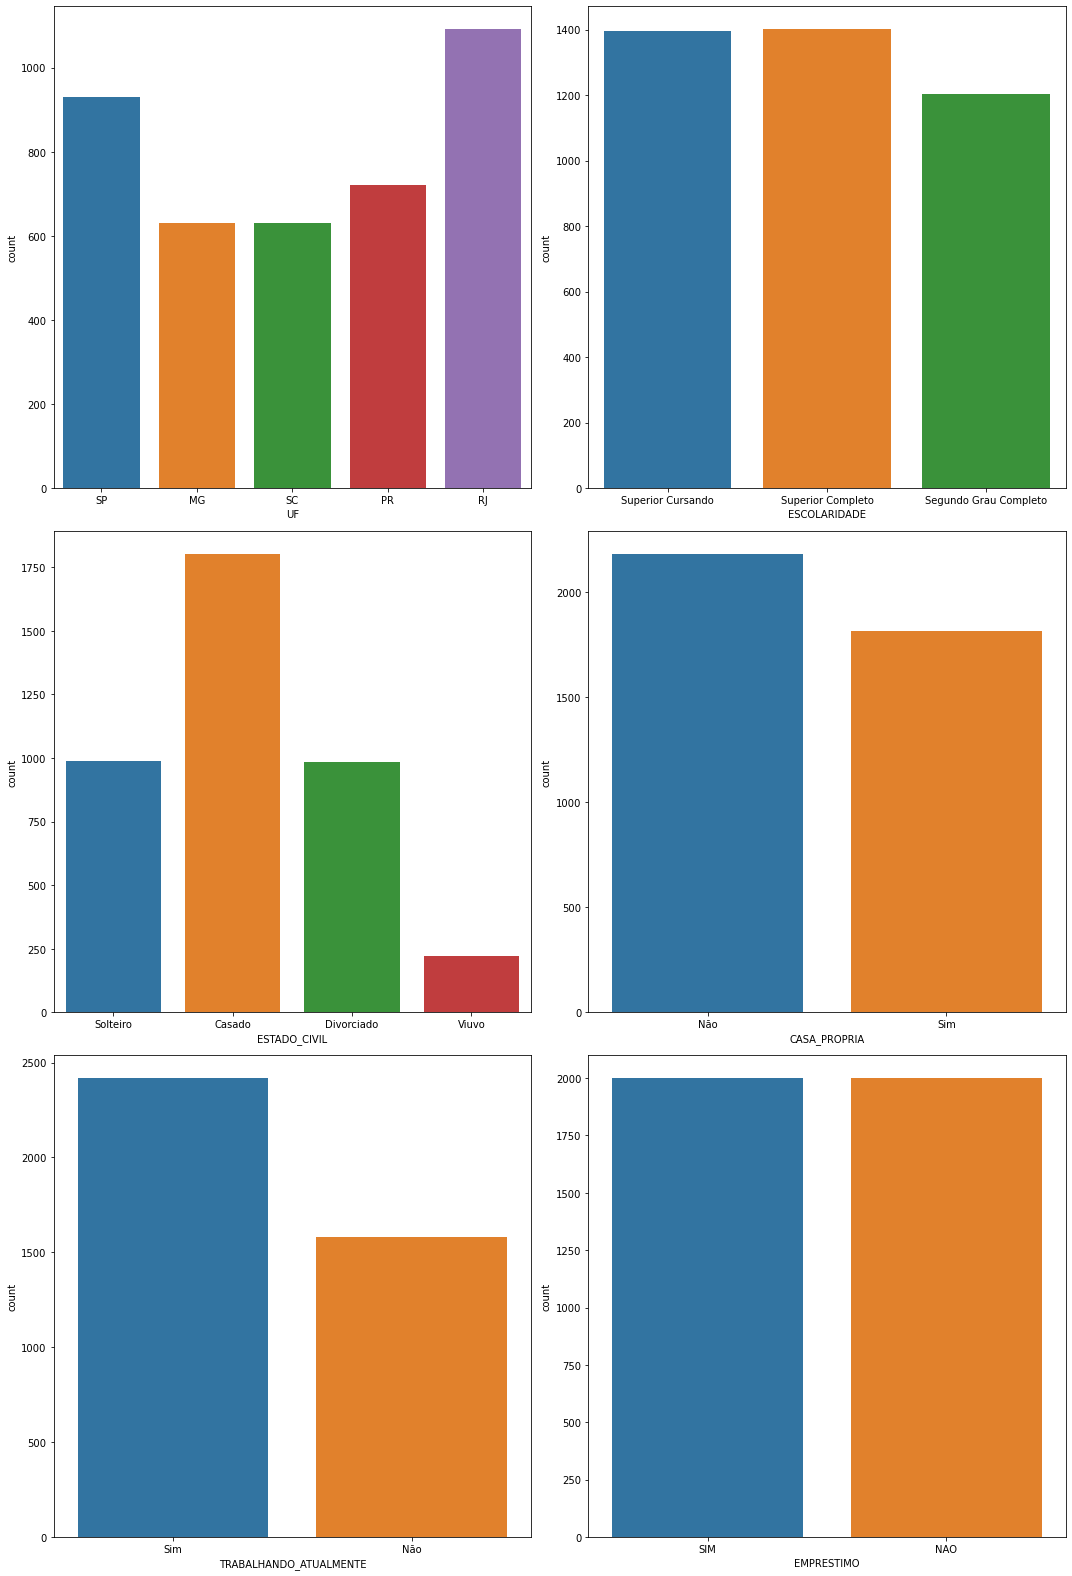

In [24]:
# With this command we will display all graphs of all columns at once to make easier our analysis.

# Here we define the screen size for displaying the graphs
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

# Here we define in how many lines and columns we want to display the graphs
f, axes = plt.subplots(3, 2) #3 lines e 2 columns

linha = 0
coluna = 0

for i in variaveis_categoricas:    
    sns.countplot(data = df_dados, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

## Data Pre-Processing

In [25]:
# Create the encoder
lb = LabelEncoder()

# Apply the encoder to the variables that are with string 
df_dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df_dados['TRABALHANDO_ATUALMENTE'])
df_dados['ESTADO_CIVIL'] = lb.fit_transform(df_dados['ESTADO_CIVIL'])
df_dados['CASA_PROPRIA'] = lb.fit_transform(df_dados['CASA_PROPRIA'])
df_dados['ESCOLARIDADE'] = lb.fit_transform(df_dados['ESCOLARIDADE'])
df_dados['UF'] = lb.fit_transform(df_dados['UF'])

# Remove missing values
df_dados.dropna(inplace = True)

In [26]:
df_dados.head(3)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
0,4,19,2,2,0,0,0,0,0,8,1,1800,0,0,56.0,SIM
1,0,23,1,2,1,0,0,0,0,9,0,4800,1,50000,18.0,NAO
2,3,25,0,0,0,1,1,220000,0,18,1,2200,2,30000,45.0,SIM


In [27]:
df_dados.shape

(4000, 16)

In [28]:
# Now we can see that we already have all numerical variables
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          4000 non-null   int32  
 1   IDADE                       4000 non-null   int64  
 2   ESCOLARIDADE                4000 non-null   int32  
 3   ESTADO_CIVIL                4000 non-null   int32  
 4   QT_FILHOS                   4000 non-null   int64  
 5   CASA_PROPRIA                4000 non-null   int32  
 6   QT_IMOVEIS                  4000 non-null   int64  
 7   VL_IMOVEIS                  4000 non-null   int64  
 8   OUTRA_RENDA_VALOR           4000 non-null   int64  
 9   TEMPO_ULTIMO_EMPREGO_MESES  4000 non-null   int64  
 10  TRABALHANDO_ATUALMENTE      4000 non-null   int32  
 11  ULTIMO_SALARIO              4000 non-null   int64  
 12  QT_CARROS                   4000 non-null   int64  
 13  VALOR_TABELA_CARROS         4000 

In [29]:
# Separating the target variable
target = df_dados.iloc[:,15]

In [30]:
target.head()

0    SIM
1    NAO
2    SIM
3    NAO
4    SIM
Name: EMPRESTIMO, dtype: object

In [31]:
# Separating the predictor variables

preditoras = df_dados.copy() # Making a copy of the dataframe

del preditoras['EMPRESTIMO'] # Excluding the target variable, as we already separated it in the previous step

preditoras.head() # Visualizing the predictor variables

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO
0,4,19,2,2,0,0,0,0,0,8,1,1800,0,0,56.000000
1,0,23,1,2,1,0,0,0,0,9,0,4800,1,50000,18.000000
2,3,25,0,0,0,1,1,220000,0,18,1,2200,2,30000,45.000000
3,1,27,2,0,1,1,0,0,0,22,0,3900,0,0,28.666667
4,4,30,0,1,0,0,0,0,0,14,1,3100,2,40000,39.666667


In [32]:
# Split into Training and Test Data.
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.20, random_state = 40)

In [33]:
# Let's apply the normalization in training and testing
# Standardization
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

## Create, evaluate and test our predictive model

<p>http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
<p>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [34]:
# Model Builder
clf = RandomForestClassifier()

In [35]:
# View the default Hyperparameters of the Model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Parameters
<p> n_estimators - number of trees in the forest;<br>
max_features - The number of features to consider when looking for the best split;<br>
max_depth - maximum depth of trees;<br>
min_samples_split - Minimum number of samples required to split an internal node;<br>
min_samples_leaf - The minimum number of samples needed to be in a leaf node;<br>
bootstrap - Whether to use the bootstrap samples when building trees. If False, the entire dataset is used to create each tree<br>

In [36]:
# Values for the hyperparameter grid
n_estimators = np.array([100,150,200,250,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])
bootstrap = np.array(["True","False"])

# Hyperparameter grid
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf,
                       bootstrap = bootstrap)

# Creating the model with the Hyperparameter Grid
clf = GridSearchCV(clf, grid_parametros, cv = 3, n_jobs = 8)

# Training the models
inicio = time.time()
clf.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Getting and viewing the trained parameters
treinos = pd.DataFrame(clf.cv_results_)

# Accuracy in Training
print(f"Acurácia em Treinamento: {clf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {clf.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos.shape[0])

Acurácia em Treinamento: 83.69%

Hiperparâmetros Ideais: {'bootstrap': 'False', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tempo de Treinamento do Modelo:  236.63

Numero de treinamentos realizados:  1080


In [37]:
# n_jobs = number of logical processors, in my case it is =8.

In [38]:
# Visualizing the parameters and training of the model
treinos.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067665,0.006127,0.0,0.0,True,gini,10,sqrt,1,1,100,"{'bootstrap': 'True', 'criterion': 'gini', 'ma...",NaN,NaN,NaN,NaN,NaN,1080
1,0.103667,0.013719,0.0,0.0,True,gini,10,sqrt,1,1,150,"{'bootstrap': 'True', 'criterion': 'gini', 'ma...",NaN,NaN,NaN,NaN,NaN,738
2,0.118332,0.002494,0.0,0.0,True,gini,10,sqrt,1,1,200,"{'bootstrap': 'True', 'criterion': 'gini', 'ma...",NaN,NaN,NaN,NaN,NaN,739
3,0.136000,0.006976,0.0,0.0,True,gini,10,sqrt,1,1,250,"{'bootstrap': 'True', 'criterion': 'gini', 'ma...",NaN,NaN,NaN,NaN,NaN,740
4,0.163667,0.004497,0.0,0.0,True,gini,10,sqrt,1,1,300,"{'bootstrap': 'True', 'criterion': 'gini', 'ma...",NaN,NaN,NaN,NaN,NaN,741


In [47]:
# Creating the classifier with Random Forest
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'gini', max_depth = 20, max_features = 'log2',
                              min_samples_leaf = 1, min_samples_split = 2, bootstrap = False)

# Build the model

clf = clf.fit(X_treino_normalizados, y_treino)

In [48]:
# We are just "simulating" the train data
scores = clf.score(X_treino_normalizados,y_treino)
scores

0.8675

In [49]:
# We are just "simulating" the test data
scores = clf.score(X_teste_normalizados,y_teste)
scores

0.82875

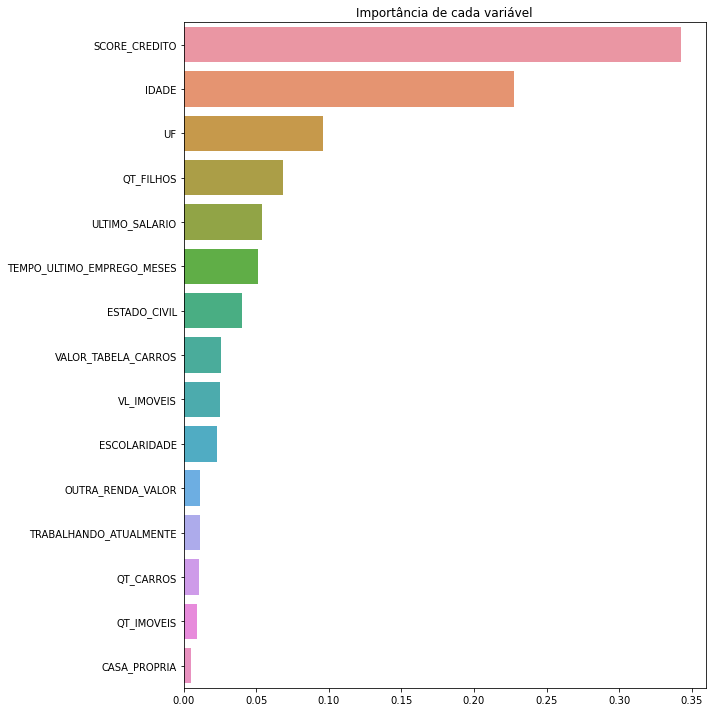

In [50]:
# Displaying the importance of each variable in the predictable model	
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [51]:
importances.sort_values(ascending = False)

SCORE_CREDITO                 0.342378
IDADE                         0.227763
UF                            0.095688
QT_FILHOS                     0.068303
ULTIMO_SALARIO                0.053982
TEMPO_ULTIMO_EMPREGO_MESES    0.051117
ESTADO_CIVIL                  0.040158
VALOR_TABELA_CARROS           0.025351
VL_IMOVEIS                    0.025109
ESCOLARIDADE                  0.023225
OUTRA_RENDA_VALOR             0.011535
TRABALHANDO_ATUALMENTE        0.010909
QT_CARROS                     0.010490
QT_IMOVEIS                    0.009015
CASA_PROPRIA                  0.004978
dtype: float64

In [52]:
# In my next version, 
# I will exclude these last values and make a correlation to know the strength of the variables.
# However 82% accuracy is reasonable

In [53]:
# by:https://www.youtube.com/@nerddosdados